<a href="https://colab.research.google.com/github/tankTopTaro/Deep-Learning-with-Python/blob/main/01_Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression

What we're going to cover
* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (*features* & *labels*)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation methods
* Saving and loading models

### Introduction to Regression with Neural Networks

**Regression** — predicting a numerical value based on some combination of variables

In [1]:
# Import TensorFlow
import tensorflow as tf
# Import NumPy and MatPlotLib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

### Creating data to view and fit

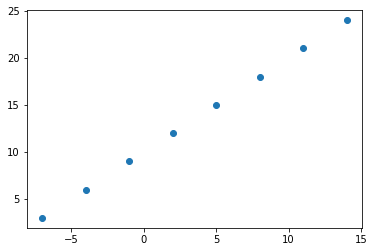

In [2]:
# Create features
_X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
_y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(_X, _y)

In [3]:
_y == _X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [4]:
# Create a demo tensor
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
# Check the X and y feature shapes
input_shape = _X[0].shape
output_shape = _y[0].shape
input_shape, output_shape

((), ())

In [6]:
_X[0].ndim

0

In [7]:
_X[0], _y[0]

(-7.0, 3.0)

In [8]:
_X[1], _y[1]

(-4.0, 6.0)

In [9]:
# Turn NumPy array into tensors with dtype float32
X = tf.constant(_X, dtype=tf.float32)
y = tf.constant(_y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with TensorFlow

1. **Creating a model** — define the `input` and `output layers`, as well as the `hidden layers` of a deep learning model.
2. **Compiling a model** — define the `loss function` (it tells our model how wrong it is) and the `optimizer` (it tells our model how to improve the patterns its learning) and `evaluation metrics` (what we can use to interpret the performance of our model).
3. **Fitting a model** — letting the model try to find patterns between `features` and `labels`

In [11]:
# Set a random seed
tf.random.set_seed(42)

In [12]:
# Create a model using the Sequential API
# The Input layer specifies that you are working with scalar inputs
model = tf.keras.Sequential([tf.keras.Input(shape=(1,)), tf.keras.layers.Dense(1)])

# Compile the model
## mae > Mean Absolute Error
## SGD > Stochastic Gradient Descent
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 558ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using the model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

### Improving the model

Improve the model by altering the steps taken in creating the model.
1. **Creating a model** — add more layer, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** — change the optimization function or perhaps the `learning rate` of the optimization function.
3. **Fitting a model** — fit a model for more `epochs` (leave it training for longer) or on more data (give the model more data to learn from)

In [17]:
# Rebuild the model

# Create the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (train the model longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 268ms/step - loss: 10.5874 - mae: 10.5874
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4549 - mae: 10.4549
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3224 - mae: 10.3224
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1899 - mae: 10.1899
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0574 - mae: 10.0574
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.9249 - mae: 9.9249
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7924 - mae: 9.7924
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 9.6599 - mae: 9.6599
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 9.5274 - mae: 9.5274
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 9.3949 - mae: 9.3949
Epoch 11/100
1/1 [==============================] - 0s 13ms/step

In [18]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
model.predict([17.0])

array([[29.834618]], dtype=float32)

In [21]:
# Rebuild the model again

# Create the model (add a hidden layer with 100 neurons)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 321ms/step - loss: 13.0842 - mae: 13.0842
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4448 - mae: 12.4448
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7987 - mae: 11.7987
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1382 - mae: 11.1382
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4613 - mae: 10.4613
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7674 - mae: 9.7674
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0461 - mae: 9.0461
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2828 - mae: 8.2828
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4796 - mae: 7.4796
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 6.6388 - mae: 6.6388
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - l

In [22]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Predict
model.predict([17.0])

array([[31.91043]], dtype=float32)

In [31]:
# Rebuild the model again

# Create the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model (change the optimizer, changing the learning_rate from 0.0001 to 0.01 brings the prediction much closer to the desired output)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 328ms/step - loss: 11.9894 - mae: 11.9894
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0877 - mae: 11.0877
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1727 - mae: 10.1727
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.2503 - mae: 9.2503
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 8.5197 - mae: 8.5197
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 7.7757 - mae: 7.7757
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 7.0120 - mae: 7.0120
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.2178 - mae: 6.2178
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 5.3880 - mae: 5.3880
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 4.5203 - mae: 4.5203
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss:

In [26]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [35]:
# Predict again (y should be near 27)
model.predict([17.0])

array([[26.524239]], dtype=float32)

### Evaluating a model

When evaluating it's a good idea to visualize:
* *The data* — what data are we working with? what does it look like?
* *The model itself* — what does our model look like?
* *The training of a model* — how does a model perform while it learns?
* *The predictions of the model* — how do the predictions of a model line up against the `ground truth` (`original labels`)?


In [36]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [37]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

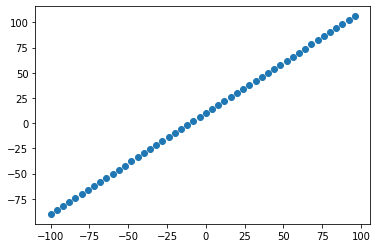

In [38]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Traninng set** — the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** — the model gets tuned on this data, which is 10-15% of the data available.
* **Test set** — the model gets evaluated on this data to test what it has learned, this set is 10-15% of the total data available.

In [39]:
# Check how many samples we have
len(X)

50

In [40]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

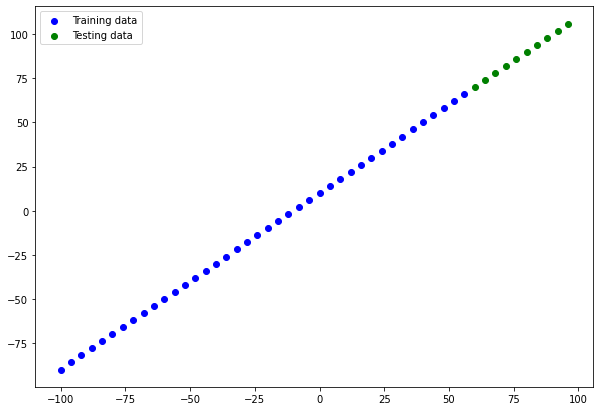

In [41]:
plt.figure(figsize=(10, 7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend()
plt.legend()